<a href="https://colab.research.google.com/github/ArindamMukerjee/PyTorch_Tutorial/blob/master/PyTorch_Lessons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np

In [0]:
torch.cuda.is_available()

True

## Tensor Operations

In [0]:
# tensor operations
x = torch.empty(2, 3)
print(x)

tensor([[1.2247e-35, 0.0000e+00, 1.5975e-43],
        [1.3873e-43, 1.4574e-43, 6.4460e-44]])


In [0]:
torch.rand(2, 2)

tensor([[0.3969, 0.9359],
        [0.0528, 0.7492]])

In [0]:
torch.zeros(2, 2)

tensor([[0., 0.],
        [0., 0.]])

In [0]:
# tensor with a specific datatype
x = torch.ones(2, 2, dtype = torch.int)
print(x.dtype)

torch.int32


In [0]:
# from a numpy array
torch.tensor(np.random.random([3, 3]))

tensor([[0.2498, 0.6714, 0.5926],
        [0.4261, 0.2380, 0.6748],
        [0.6482, 0.7705, 0.4645]], dtype=torch.float64)

In [0]:
# add and update a tensor
x = torch.rand(2, 2) 
y = torch.rand(2, 2)
y.add_(x)

tensor([[0.7365, 1.0182],
        [1.0378, 1.0005]])

In [0]:
# save a tensor to gpu (it can't be converted to numpy)
device = torch.device('cuda')
x = torch.ones(5)
x.to(device)

tensor([1., 1., 1., 1., 1.], device='cuda:0')

## Autograd

In [0]:
x = torch.randn(3, requires_grad = True)
print(x)

tensor([-0.5050,  0.7355,  0.0447], requires_grad=True)


In [0]:
# gradients with a scalar output
y = x + 2
z = y * y * 2
z = z.mean()
z.backward()
print(x.grad)

tensor([1.9934, 3.6473, 2.7263])


In [0]:
# gradients with vector output
y = x + 2
z = y * y * 2
vec = torch.tensor([0.1, 1.0, .001], dtype = torch.float32)
z.backward(vec)
print(x.grad)

tensor([ 2.5914, 14.5893,  2.7345])


In [0]:
# prevent function from tracking gradients
x = torch.randn(3, requires_grad = True)
x.requires_grad_(False)
print(x)

tensor([-1.3093, -0.8800,  1.1363])


In [0]:
# second option
x = torch.randn(3, requires_grad = True)
y = x.detach()
print(y)

tensor([-1.1350, -0.7366,  1.0328])


In [0]:
# third option
with torch.no_grad():
  y = x + 2
  print(y)

tensor([0.8650, 1.2634, 3.0328])


In [0]:
# method to make sure that weights do not accumulate
weights = torch.ones(4, requires_grad = True)
for epoch in range(3):
  model_output = (weights * 3).sum()
  model_output.backward()
  print(weights.grad)
  weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


## Backprop

In [0]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)
w = torch.tensor(1.0, requires_grad = True)

# forward pass
y_hat = w * x
loss = (y_hat - y)**2

# backward pass
loss.backward()
print(w.grad)

# update weight and continue forward and backward pass

tensor(-2.)


## Gradient from scratch (2 methods)

In [0]:
# manual learning
X = np.array([1, 2, 3, 4], dtype = np.float32)
Y = np.array([2, 4, 6, 8], dtype = np.float32)
w = 0.0

# model prediction
def forward(x):
    return w * x

# loss
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

# gradient
def gradient(x, y, y_pred):
    return np.dot(2 * x, y_pred - y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 10

for epoch in range(n_iters):
    # prediction
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)

    # gradients
    dw = gradient(X, Y, y_pred)

    # update weights
    w -= learning_rate * dw

    if epoch % 1 == 0:
        print(f'epoch {epoch+1} : w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training : f(5) = {forward(5) : .3f}')

Prediction before training: f(5) = 0.000
epoch 1 : w = 1.200, loss = 30.00000000
epoch 2 : w = 1.680, loss = 4.79999924
epoch 3 : w = 1.872, loss = 0.76800019
epoch 4 : w = 1.949, loss = 0.12288000
epoch 5 : w = 1.980, loss = 0.01966083
epoch 6 : w = 1.992, loss = 0.00314574
epoch 7 : w = 1.997, loss = 0.00050331
epoch 8 : w = 1.999, loss = 0.00008053
epoch 9 : w = 1.999, loss = 0.00001288
epoch 10 : w = 2.000, loss = 0.00000206
Prediction after training : f(5) =  9.999


In [0]:
# automated gradient
X = torch.tensor([1, 2, 3, 4], dtype = torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype = torch.float32)
w = torch.tensor(0.0, requires_grad = True, dtype = torch.float32)

# model prediction 
def forward(x):
    return w * x

# loss
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

# learning
learning_rate = 0.01
n_iters = 20
for epoch in range(n_iters):
    # prediction
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)

    # gradients
    l.backward()

    # update weights
    with torch.no_grad():
        w -= learning_rate * w.grad
    
    # zero gradients
    w.grad.zero_()

    if epoch % 2 == 0:
        print(f'epoch {epoch + 1} : w = {w : .3f}, loss = {l : .8f}')

print(f'Prediction after training : f(5) = {forward(5) : .3f}')

epoch 1 : w =  0.300, loss =  30.00000000
epoch 3 : w =  0.772, loss =  15.66018772
epoch 5 : w =  1.113, loss =  8.17471695
epoch 7 : w =  1.359, loss =  4.26725292
epoch 9 : w =  1.537, loss =  2.22753215
epoch 11 : w =  1.665, loss =  1.16278565
epoch 13 : w =  1.758, loss =  0.60698116
epoch 15 : w =  1.825, loss =  0.31684780
epoch 17 : w =  1.874, loss =  0.16539653
epoch 19 : w =  1.909, loss =  0.08633806
Prediction after training : f(5) =  9.612


## Training Pipeline

In [0]:
import torch.nn as nn

In [0]:
X = torch.tensor([1, 2, 3, 4], dtype = torch.float32).reshape(4, 1)
Y = torch.tensor([2, 4, 6, 8], dtype = torch.float32).reshape(4, 1)

X_test = torch.tensor([5], dtype = torch.float32)

n_samples, n_features = X.shape

# pytorch model
input_size = n_features
output_size = n_features

model = nn.Linear(input_size, output_size)

print(f'Prediction before training : f(5) = {model(X_test).item() : .3f}')

# training 
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for epoch in range(n_iters):
    # prediction
    y_pred = model(X)

    # loss
    l = loss(Y, y_pred)

    # gradients
    l.backward()

    # update weights
    optimizer.step()

    # zero gradients
    optimizer.zero_grad()

    if epoch % 10 == 0:
        [w, b] = model.parameters()
        print(f'epoch {epoch + 1} : w = {w[0][0].item() : .3f}, loss = {l : .8f}')

print(f'Prediction after training {model(X_test).item() : .3f}')

Prediction before training : f(5) =  3.697
epoch 1 : w =  0.791, loss =  10.45881748
epoch 11 : w =  1.536, loss =  0.41821748
epoch 21 : w =  1.664, loss =  0.14985111
epoch 31 : w =  1.692, loss =  0.13481550
epoch 41 : w =  1.704, loss =  0.12680523
epoch 51 : w =  1.713, loss =  0.11942028
epoch 61 : w =  1.722, loss =  0.11246924
epoch 71 : w =  1.730, loss =  0.10592294
epoch 81 : w =  1.738, loss =  0.09975767
epoch 91 : w =  1.746, loss =  0.09395130
Prediction after training  9.490


## Linear Regression

epoch : 10, loss =  4396.3535
epoch : 20, loss =  3279.5200
epoch : 30, loss =  2471.5444
epoch : 40, loss =  1886.3839
epoch : 50, loss =  1462.1691
epoch : 60, loss =  1154.3488
epoch : 70, loss =  930.7967
epoch : 80, loss =  768.3163
epoch : 90, loss =  650.1384
epoch : 100, loss =  564.1260


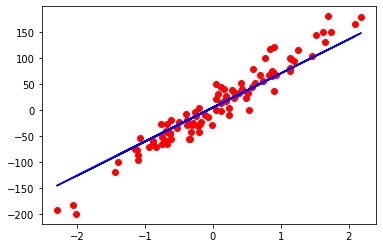

In [0]:
import torch.nn as nn
from sklearn import datasets
import matplotlib.pyplot as plt

# data prep
X, y = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 1)

X = torch.from_numpy(X.astype(np.float32))
y = torch.from_numpy(y.astype(np.float32)).reshape(-1, 1)

n_samples, n_features = X.shape

# model definition
model = nn.Linear(n_features, 1)

# loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_pred = model(X)
    loss = criterion(y_pred, y)

    # backward pass
    loss.backward()

    # weight update
    optimizer.step()

    # empty gradients
    optimizer.zero_grad()

    if (epoch + 1) % 10 == 0:
        print(f'epoch : {epoch + 1}, loss = {loss.item() : .4f}')

# plot
predicted = model(X).detach().numpy()
plt.plot(X, y, 'ro')
plt.plot(X, predicted, 'b')
plt.show()

## Logistic Regression

In [0]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# data prep
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32)).reshape(-1, 1)
y_test = torch.from_numpy(y_test.astype(np.float32)).reshape(-1, 1)

# model
class LogisticRegression(nn.Module):
    def __init__(self, n_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_features, 1)

    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted

model = LogisticRegression(n_features)

# loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)

    # backward pass
    loss.backward()

    # weight updates
    optimizer.step()

    # zero gradients
    optimizer.zero_grad()

    # print values
    if (epoch + 1) % 10 == 0:
        print(f'epoch : {epoch + 1}, loss = {loss.item() : .4f}')

with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy = {acc : .4f}')

epoch : 10, loss =  0.6836
epoch : 20, loss =  0.5266
epoch : 30, loss =  0.4362
epoch : 40, loss =  0.3788
epoch : 50, loss =  0.3391
epoch : 60, loss =  0.3099
epoch : 70, loss =  0.2874
epoch : 80, loss =  0.2694
epoch : 90, loss =  0.2546
epoch : 100, loss =  0.2422
accuracy =  0.9035


## Dataset and Data Loader